## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [66]:
full_data = pd.read_excel("C:/Users/bodin/School/STAT 5001/project/baseballdata.xlsx")
full_data.head()

,date,game_num,day_of_week,away_team,away_league,away_game_num,home_team,home_league,home_game_num,away_score,...,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,D
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,D
2,18710506,0,Sat,CL1,NaN,2,RC1,NaN,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,D
3,18710508,0,Mon,CL1,NaN,3,CH1,NaN,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,D
4,18710509,0,Tue,BS1,NaN,2,TRO,NaN,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,D


## Exploratory data analysis

In [67]:
print(f"Shape of dataset {full_data.shape}")
print(f"Total datapoints {full_data.shape[0] * data.shape[1]}")

Shape of dataset (228188, 161)
Total datapoints 6845640


In [68]:
print("Columns in the DataFrame:")
print(full_data.columns.tolist())

Columns in the DataFrame:
['date', 'game_num', 'day_of_week', 'away_team', 'away_league', 'away_game_num', 'home_team', 'home_league', 'home_game_num', 'away_score', 'home_score', 'len_in_outs', 'day_or_night', 'completion_info', 'forfeit_info', 'protest_info', 'park_id', 'attendance', 'len_in_minutes', 'away_linescore', 'home_linescore', 'away_AB', 'away_H', 'away_2B', 'away_3B', 'away_HR', 'away_RBI', 'away_SH', 'away_SF', 'away_HBP', 'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 'away_GIDP', 'away_CI', 'away_LOB', 'away_num_pitchers', 'away_iER', 'away_tER', 'away_WP', 'away_BK', 'away_PO', 'away_A', 'away_E', 'away_PB', 'away_DP', 'away_TP', 'home_AB', 'home_H', 'home_2B', 'home_3B', 'home_HR', 'home_RBI', 'home_SH', 'home_SF', 'home_HBP', 'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 'home_GIDP', 'home_CI', 'home_LOB', 'home_num_pitchers', 'home_iER', 'home_tER', 'home_WP', 'home_BK', 'home_PO', 'home_A', 'home_E', 'home_PB', 'home_DP', 'home_TP', 'hp_ump_id', 'h

In [92]:
# Remove games played before the year 2000
data = full_data[full_data['date'] > 20000101]   #yyyymmdd

In [93]:
data.head()

,date,game_num,day_of_week,away_team,away_league,away_game_num,home_team,home_league,home_game_num,away_score,...,home_7_name,home_7_pos,home_8_id,home_8_name,home_8_pos,home_9_id,home_9_name,home_9_pos,additional_info,acquisition_info
172004,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,...,Todd Zeile,3.0,ordor001,Rey Ordonez,6.0,hampm001,Mike Hampton,1.0,NaN,Y
172005,20000330,0,Thu,NYN,NL,2,CHN,NL,2,5,...,Jeff Huson,6.0,giraj001,Joe Girardi,2.0,farnk001,Kyle Farnsworth,1.0,NaN,Y
172006,20000403,0,Mon,COL,NL,1,ATL,NL,1,0,...,Eddie Perez,2.0,weisw001,Walt Weiss,6.0,maddg002,Greg Maddux,1.0,NaN,Y
172007,20000403,0,Mon,MIL,NL,1,CIN,NL,1,3,...,Aaron Boone,5.0,tuckm001,Michael Tucker,7.0,harnp001,Pete Harnisch,1.0,NaN,Y
172008,20000403,0,Mon,SFN,NL,1,FLO,NL,1,4,...,Brant Brown,9.0,redmm001,Mike Redmond,2.0,ferna001,Alex Fernandez,1.0,NaN,Y


In [94]:
# Full dataset
data = data[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 
             'home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score']]

# Input variables only
'''
data_x = data[['away_AB', 'away_2B', 'away_3B', 
              'away_HR','away_SH', 'away_SF', 'away_HBP', 
              'away_BB', 'away_IBB', 'away_K', 'away_SB',
               'away_CS', 'away_GIDP', 'away_CI',
               'home_AB', 'home_2B', 'home_3B', 'home_HR', 
              'home_SH', 'home_SF', 'home_HBP', 'home_BB', 
              'home_IBB', 'home_K', 'home_SB', 'home_CS', 'home_GIDP', 
              'home_CI']]
'''

# Output variables only
#data_y = data[['away_score', 'home_score']]


"\ndata_x = data[['away_AB', 'away_2B', 'away_3B', \n              'away_HR','away_SH', 'away_SF', 'away_HBP', \n              'away_BB', 'away_IBB', 'away_K', 'away_SB',\n               'away_CS', 'away_GIDP', 'away_CI',\n               'home_AB', 'home_2B', 'home_3B', 'home_HR', \n              'home_SH', 'home_SF', 'home_HBP', 'home_BB', \n              'home_IBB', 'home_K', 'home_SB', 'home_CS', 'home_GIDP', \n              'home_CI']]\n"

In [95]:
print(f"Shape of updated dataset {data.shape}")
print(f"Total datapoints {data.shape[0] * data.shape[1]}")

Shape of updated dataset (55175, 32)
Total datapoints 1765600


In [96]:
print(data.isna().sum())
data_x = data_x.dropna()

away_AB       0
away_H        0
away_2B       0
away_3B       0
away_HR       0
away_SH       0
away_SF       0
away_HBP      0
away_BB       0
away_IBB      0
away_K        0
away_SB       0
away_CS       0
away_GIDP     0
away_CI       0
away_score    0
home_AB       0
home_H        0
home_2B       0
home_3B       0
home_HR       0
home_SH       0
home_SF       0
home_HBP      0
home_BB       0
home_IBB      0
home_K        0
home_SB       0
home_CS       0
home_GIDP     0
home_CI       0
home_score    0
dtype: int64


Given the amount of data we have, we can afford to drop the **na** values. Additionally, most of these values come from a time period which will most likely be left out of the final dataset. *Note: all na values removed when using dates from 2000+*

In [97]:
# Add singles column as specified in our write-up
data['away_1B'] = data['away_H'] - data['away_2B'] - data['away_3B'] - data['away_HR']
data['home_1B'] = data['home_H'] - data['home_2B'] - data['home_3B'] - data['home_HR']

In [106]:
# Separate home and away
data_home = data[['home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score', 'home_1B']]

data_away = data[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 'away_1B']]

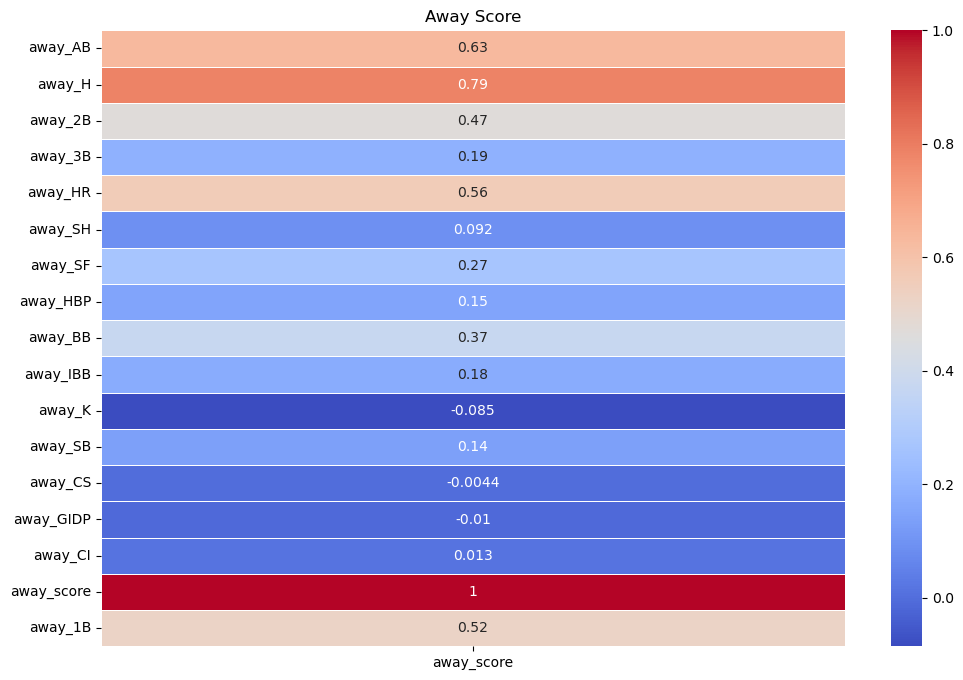

In [108]:
import seaborn as sns

correlation_matrix = data_away.corr()

# Select the correlation of the "score" column with all other columns
score_correlation = correlation_matrix['away_score']

# Create a heatmap for the selected correlation
plt.figure(figsize=(12, 8))
sns.heatmap(score_correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Away Score')
plt.show()

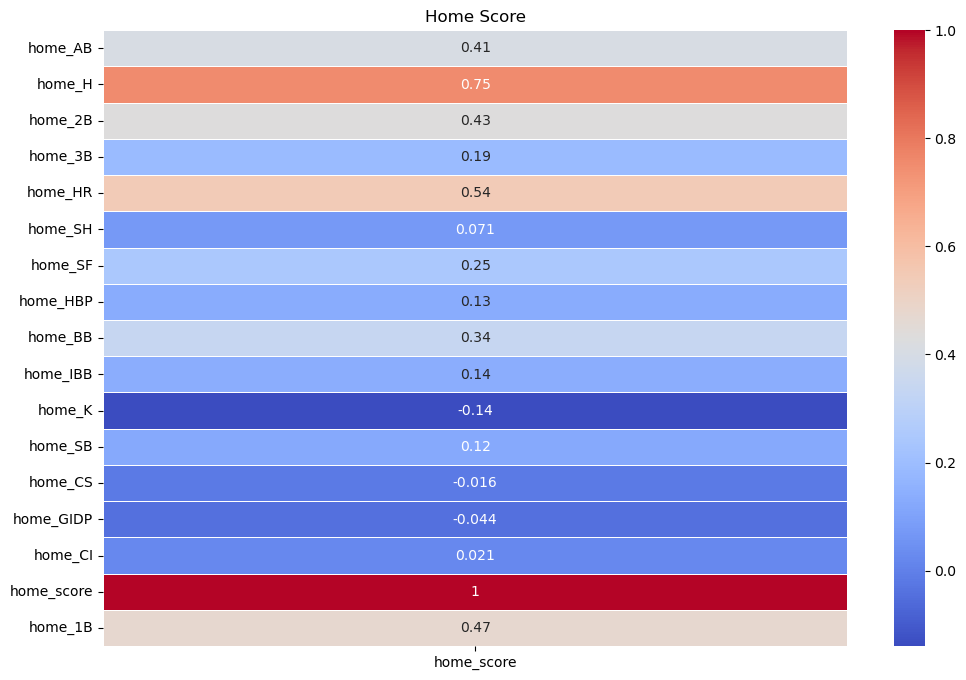

In [110]:
import seaborn as sns

correlation_matrix = data_home.corr()

# Select the correlation of the "score" column with all other columns
score_correlation = correlation_matrix['home_score']

# Create a heatmap for the selected correlation
plt.figure(figsize=(12, 8))
sns.heatmap(score_correlation.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Home Score')
plt.show()

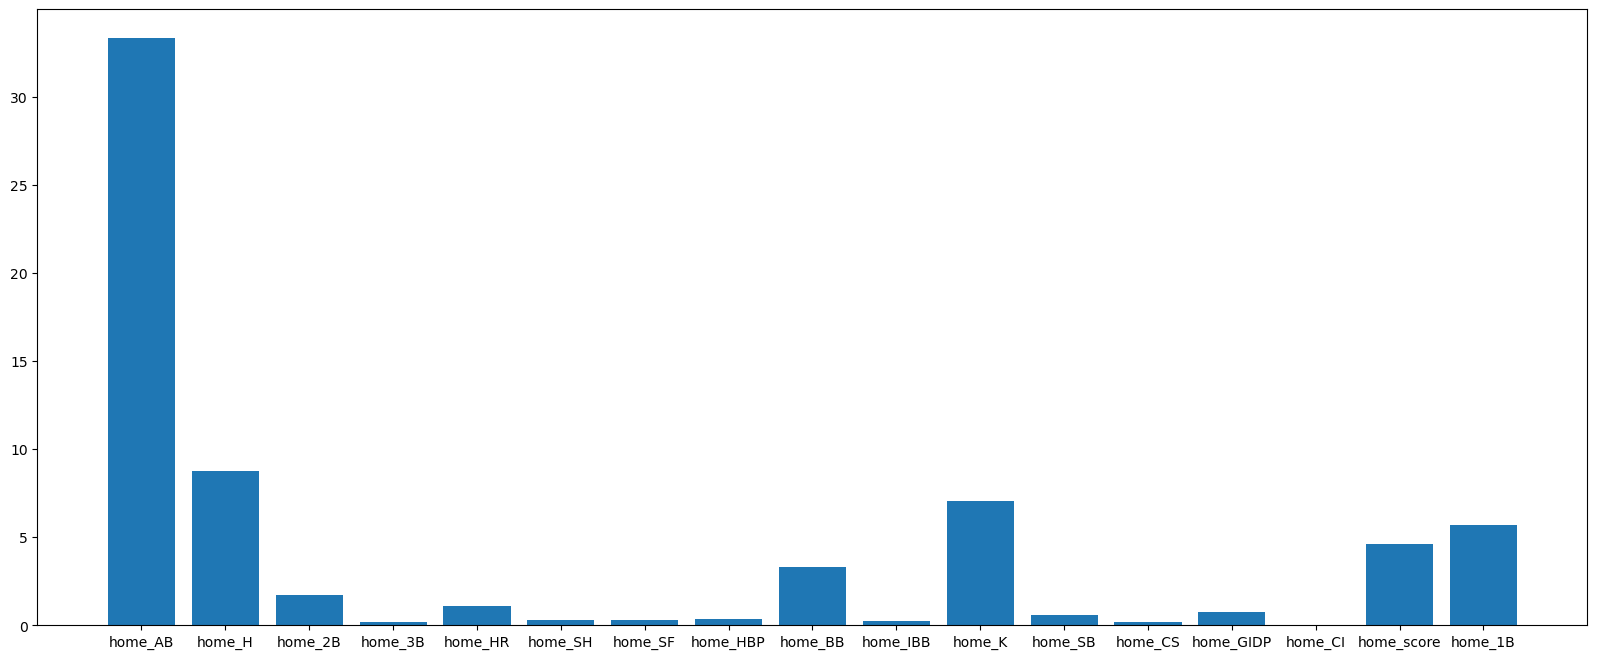

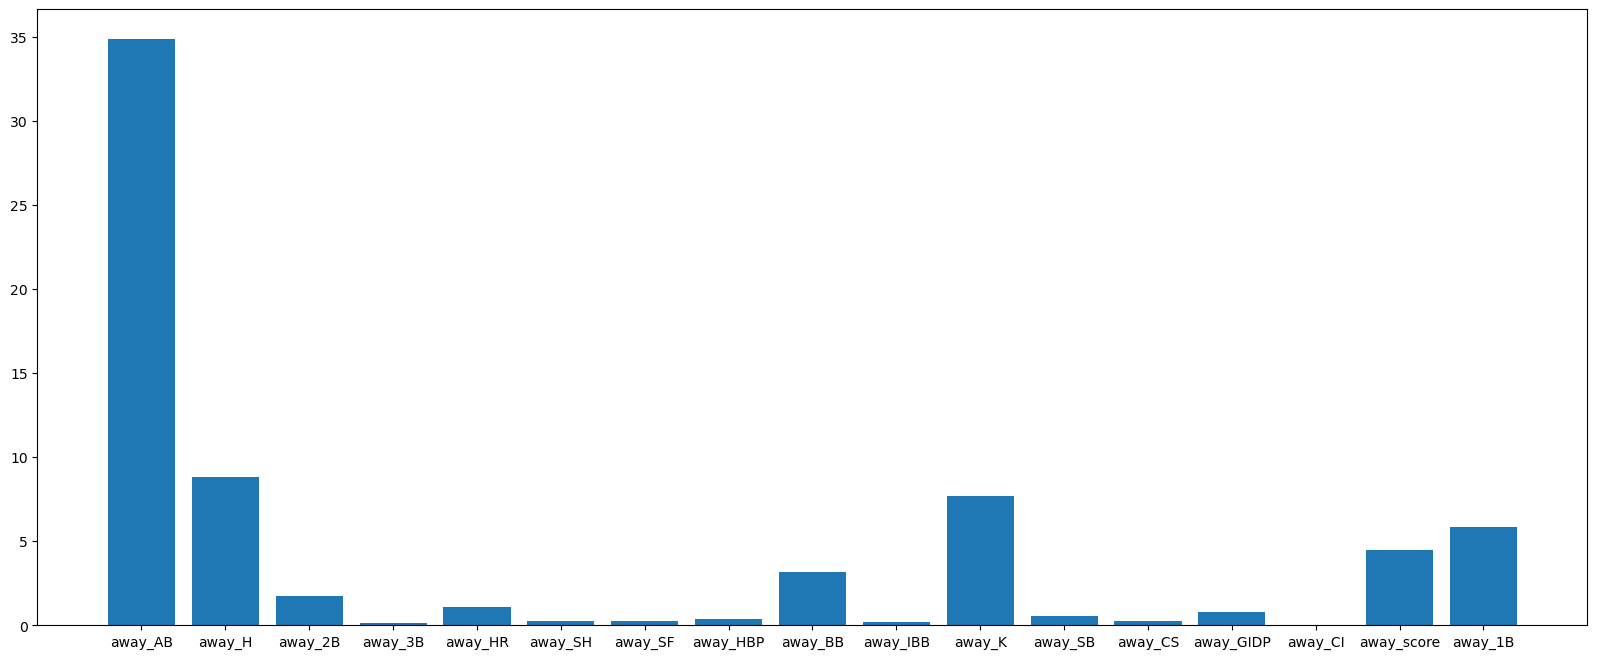

In [119]:
home_averages = data_home.mean()
away_averages = data_away.mean()

plt.figure(figsize = (20,8))
plt.bar(home_averages.index, home_averages.values)
plt.show()
plt.figure(figsize = (20,8))
plt.bar(away_averages.index, away_averages.values)
plt.show()